### **Packages**

In [1]:
!pip install mediapipe

     |████████████████████████████████| 36.1MB 81kB/s 


In [2]:
import pandas as pd
import numpy as np
import mediapipe as mp
import cv2
# from google.colab.patches import cv2_imshow

import os
import shutil
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Folder Pre-Process**

In [ ]:
# Getting files to 1 folder in each class

path = '/content/drive/MyDrive/Dataset'
dest = '/content/drive/MyDrive/Fix Data'
name = ['Stane', 'Calvin']

os.mkdir(dest)
for i in char:
  os.mkdir(os.path.join(dest, i))

for i in char:
  for k in name:
    src = os.path.join(path, i, k)
    for j in os.listdir(src):
      source = os.path.join(src, j)
      des = os.path.join(dest, i, j)
      shutil.copyfile(source, des)


# Renaming the files
path = '/content/drive/MyDrive/Fix Data'
for folder in os.listdir(path):
  fol_path = os.path.join(path, folder)
  for num, files in enumerate(os.listdir(fol_path)):
    src = os.path.join(fol_path, files)
    renamed = os.path.join(fol_path, f'{folder}_{num+1}.jpg')
    os.rename(src, renamed)

In [7]:
# Creating test data folder
char = 'abcdefghijklmnopqrstuvwxy'.upper()
path = '/content/drive/MyDrive/Dataset'
name = ['Ayu', 'Fatia']

os.mkdir('/content/drive/MyDrive/Test Data')
for characters in char:
  os.mkdir(os.path.join('/content/drive/MyDrive/Test Data', characters))

test_path = '/content/drive/MyDrive/Test Data'

for i in char:
  for j in name:
    src = os.path.join(path, i, j)
    for img in os.listdir(src):
      source = os.path.join(src, img)
      dest = os.path.join(test_path, i, img)
      shutil.copyfile(source, dest)

### **Hand Detection & Bounding Box**

##### Alternative

In [ ]:
def crop_img (path):

  mp_hands = mp.solutions.hands
  mp_drawing = mp.solutions.drawing_utils

  with mp_hands.Hands(static_image_mode=True) as hands:

    img = cv2.imread(path)
    img = cv2.resize(img, (540, 960))
    height, width, color = img.shape
    results = hands.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    if results.multi_hand_landmarks != None:

        x_max = 0
        y_max = 0
        x_min = width
        y_min = height
        tol = 25

        for handLandmarks in results.multi_hand_landmarks:
          for landmarks in handLandmarks.landmark:
            x, y = int(landmarks.x * width), int(landmarks.y * height)
            if x > x_max:
                x_max = x
            if x < x_min:
                x_min = x
            if y > y_max:
                y_max = y
            if y < y_min:
                y_min = y
            
          mp_drawing.draw_landmarks(img, handLandmarks, mp_hands.HAND_CONNECTIONS)

        coor = [x_min - tol, x_max + tol, y_min - tol, y_max + tol]
        x_min, x_max, y_min, y_max = [round(num) for num in coor]

    cropped_img = img[y_min : y_max, x_min : x_max]
    cv2.imshow(cropped_img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

##### Used

Getting the skeletons.

In [ ]:
def black_img (path):
  ''' This function will take a picture, and then generate hand skeletons on
  a black background which will replace the picture. If the hand skeleton
  cannot be generated from the picture, the picture will get deleted. '''

  mp_hands = mp.solutions.hands
  mp_drawing = mp.solutions.drawing_utils
  
  with mp_hands.Hands(static_image_mode=True) as hands:

    img = cv2.imread(path)
    img = cv2.resize(img, (540, 960))
    blackFrame = np.zeros((960, 540, 3), np.uint8)

    height, width, color = img.shape
    results = hands.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    if results.multi_hand_landmarks != None:

        x_max = 0
        y_max = 0
        x_min = width
        y_min = height
        tol = 25

        for handLandmarks in results.multi_hand_landmarks:
          for landmarks in handLandmarks.landmark:
            x, y = int(landmarks.x * width), int(landmarks.y * height)
            if x > x_max:
                x_max = x
            if x < x_min:
                x_min = x
            if y > y_max:
                y_max = y
            if y < y_min:
                y_min = y 

          mp_drawing.draw_landmarks(blackFrame, handLandmarks, mp_hands.HAND_CONNECTIONS)
        
        coor = [max(x_min - tol, 0), min(x_max+ tol, 540), 
                max(y_min - tol, 0), min(y_max + tol, 960)]

        x_min, x_max, y_min, y_max = [round(num) for num in coor]

        blackFrame = blackFrame[y_min : y_max, x_min : x_max]
        cv2.imwrite(path, blackFrame)

    else:
      os.remove(path)
      print(path, 'No landmark found. File Deleted.')

    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
path = '/content/drive/MyDrive/Fix Data'

for folder in os.listdir(path):
  src = os.path.join(path, folder)
  for file_ in os.listdir(src):
    name = os.path.join(src, file_)
    black_img(name)

/content/drive/MyDrive/Fix Data/C/C_9.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/F/F_10.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/H/H_4.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/H/H_5.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/H/H_9.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/M/M_22.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/P/P_2.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/P/P_9.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/P/P_11.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/P/P_14.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/P/P_19.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/P/P_20.jpg No landmark found. File Deleted.
/content/drive/MyDrive/Fix Data/P/P_21.jpg No landmark found. File Deleted.
/content/drive/MyD

Padding and Resizing Images

In [ ]:
def pad (img_path):
  ''' This function will pad and resize the image, the image will be padded so
  it will be in square shape, and then resized to (300, 300, 3)'''

  img = cv2.imread(img_path)
  width, length, channel = img.shape
  size = max([width, length])

  top = round((size - width)/2)
  left = round((size - length)/2)
  bottom = top
  right = left

  img = cv2.copyMakeBorder(img, top = top, bottom = bottom,
                           left = left, right = right,
                           borderType = cv2.BORDER_CONSTANT,
                           value = [0, 0, 0])
  
  img = cv2.resize(img, (300, 300))

  cv2.imwrite(img_path, img)

In [ ]:
path = '/content/drive/MyDrive/Fix Data'

for folders in os.listdir(path):
  for img in os.listdir(os.path.join(path, folders)):
    pad(os.path.join(path, folders, img))

Splitting into train and val set.

In [ ]:
# Splitting into train and val set

os.mkdir('/content/drive/MyDrive/SplitData')
os.mkdir('/content/drive/MyDrive/SplitData/train')
os.mkdir('/content/drive/MyDrive/SplitData/val')

for i in char:
  os.mkdir(os.path.join('/content/drive/MyDrive/SplitData/train', i))
  os.mkdir(os.path.join('/content/drive/MyDrive/SplitData/val', i))

def data_split (train):
  source = '/content/drive/MyDrive/Fix Data'
  dest_train = '/content/drive/MyDrive/SplitData/train'
  dest_val = '/content/drive/MyDrive/SplitData/val'

  for folders in os.listdir(source):
    fol_path = os.path.join(source, folders)
    files = os.listdir(fol_path)
    random.shuffle(files)

    num_of_files = len(files)
    train_idx = round(train * num_of_files)

    for file_ in files[0:train_idx]:
      origin = os.path.join(fol_path, file_)
      dest = os.path.join(dest_train, folders, file_)
      shutil.copy(origin, dest)
    
    for file_ in files[train_idx:]:
      origin = os.path.join(fol_path, file_)
      dest = os.path.join(dest_val, folders, file_)

      shutil.copy(origin, dest)

data_split(0.8)

Checking images.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

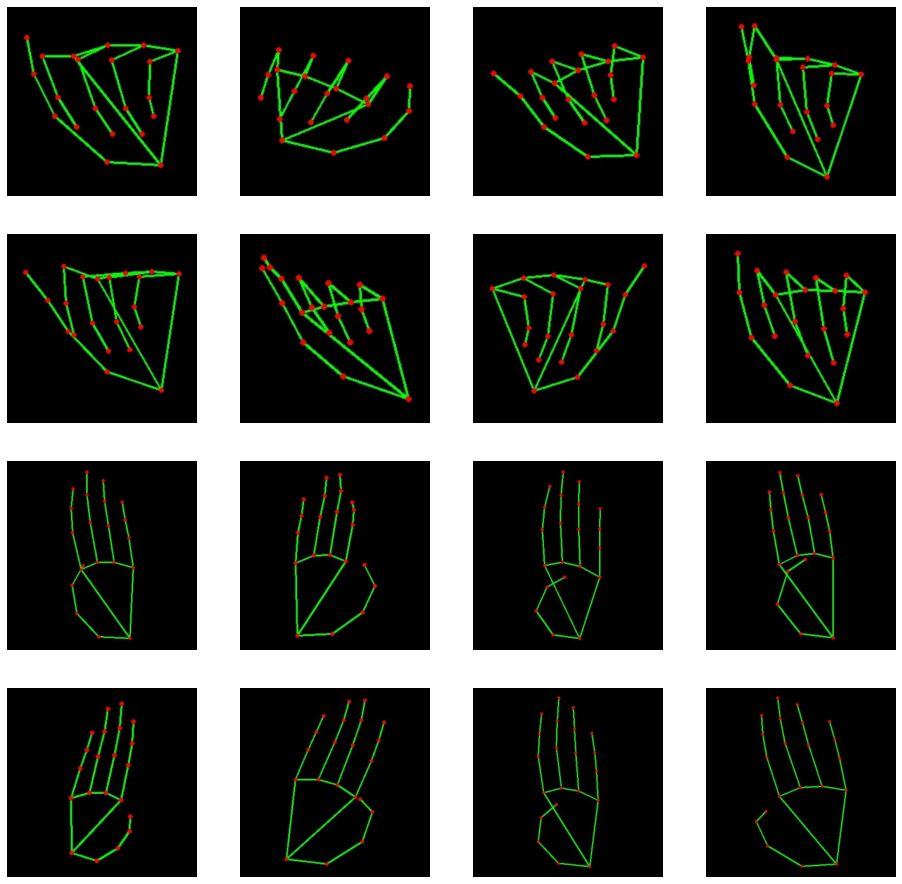

In [ ]:
train_A_path = '/content/drive/MyDrive/SplitData/train/A'
train_B_path = '/content/drive/MyDrive/SplitData/train/B'
train_A_fnames = os.listdir(train_A_path)
train_B_fnames = os.listdir(train_B_path)

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_A_pix = [os.path.join(train_A_path, fname) 
                for fname in train_A_fnames[ pic_index-8:pic_index] 
               ]

next_B_pix = [os.path.join(train_B_path, fname) 
                for fname in train_B_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_A_pix + next_B_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### **Hand Detection & Bounding Box (WebCam)**

IDK why, this doesn't work in Google Colab, but it's tested on Jupyter Notebook to give result similar to static images.

In [ ]:
import cv2
import mediapipe as mp
 
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
 
capture = cv2.VideoCapture(0)
 
with mp_hands.Hands(static_image_mode=False, min_detection_confidence=0.7, min_tracking_confidence=0.7, max_num_hands=2) as hands:

  while (True):
    ret, frame = capture.read()
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
 
    if results.multi_hand_landmarks != None:
      for handLandmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(frame, handLandmarks, mp_hands.HAND_CONNECTIONS)
 
    cv2.imshow('Test hand', frame)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
 
cv2.destroyAllWindows()
capture.release()

error: ignored

### **Modeling**

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-05-13 18:24:54--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.13.80, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   245MB/s    in 0.3s    

2021-05-13 18:24:54 (245 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
base_dir = '/content/drive/MyDrive/SplitData'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                    target_size = (300, 300))

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size  = 2,
                                                         class_mode  = 'categorical',
                                                         target_size = (300,300))

Found 970 images belonging to 25 classes.
Found 247 images belonging to 25 classes.


In [ ]:
local_weight = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weight)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
last_out = pre_trained_model.get_layer('mixed10').output

x = layers.Flatten()(last_out)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(25, activation = 'softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer = Adam(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 12,
                    validation_steps = 50,
                    verbose = 1)

Epoch 1/12
97/97 [==============================] - 14s 105ms/step - loss: 53.5189 - accuracy: 0.2894 - val_loss: 2.8504 - val_accuracy: 0.6500
Epoch 2/12
97/97 [==============================] - 9s 92ms/step - loss: 2.5431 - accuracy: 0.7172 - val_loss: 1.1023 - val_accuracy: 0.7400
Epoch 3/12
97/97 [==============================] - 9s 92ms/step - loss: 0.7828 - accuracy: 0.7750 - val_loss: 1.5491 - val_accuracy: 0.7800
Epoch 4/12
97/97 [==============================] - 9s 92ms/step - loss: 0.6026 - accuracy: 0.8435 - val_loss: 1.0729 - val_accuracy: 0.8300
Epoch 5/12
97/97 [==============================] - 9s 93ms/step - loss: 0.6250 - accuracy: 0.8581 - val_loss: 1.1572 - val_accuracy: 0.8300
Epoch 6/12
97/97 [==============================] - 9s 92ms/step - loss: 0.5961 - accuracy: 0.8530 - val_loss: 0.9464 - val_accuracy: 0.7700
Epoch 7/12
97/97 [==============================] - 9s 92ms/step - loss: 0.8095 - accuracy: 0.8347 - val_loss: 1.1279 - val_accuracy: 0.8100
Epoch 8/12

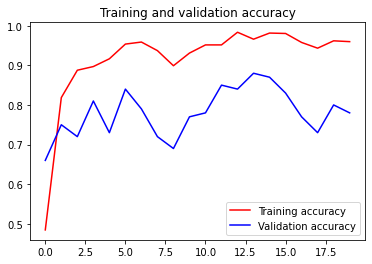

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

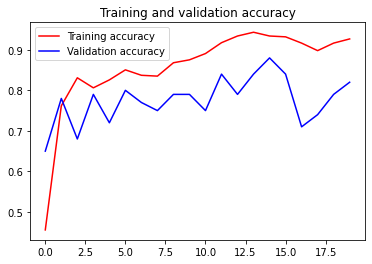

<Figure size 432x288 with 0 Axes>

In [ ]:
# For model with dropout layer

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save('/content/drive/MyDrive/prototype.h5')

### **Prediction**

In [9]:
model = tf.keras.models.load_model('/content/drive/MyDrive/prototype.h5')

In [12]:
label_dict = {}

for idx, label in enumerate(char):
  label_dict[idx] = label

In [ ]:
def pred(path):
  ''' For processing and predicting images'''
  img = image.load_img(path, target_size=(300, 300))
  img = image.img_to_array(img)
  img = img/255.0
  img = np.expand_dims(img, axis=0)
  return label_dict[np.argmax(model.predict(img), axis = 1)[0]]

In [ ]:
df = pd.DataFrame(columns = label_dict.values(),
                  index = label_dict.values())
df.replace(np.NaN, 0, inplace = True)

path = '/content/drive/MyDrive/SplitData/val'
for folders in os.listdir(path):
  for imgs in os.listdir(os.path.join(path, folders)):
    y = pred(os.path.join(path, folders, imgs))
    df.loc[y, folders] += 1

df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
A,9,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
B,0,10,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,0,0,8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
D,0,0,0,9,0,0,0,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
E,0,0,1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
G,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
H,0,0,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
J,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
def img_convert (path):
  '''Processing images for prediction'''

  mp_hands = mp.solutions.hands
  mp_drawing = mp.solutions.drawing_utils
  
  with mp_hands.Hands(static_image_mode=True) as hands:

    img = cv2.imread(path)
    img = cv2.resize(img, (540, 960))
    blackFrame = np.zeros((960, 540, 3), np.uint8)

    height, width, color = img.shape
    results = hands.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    if results.multi_hand_landmarks != None:

        x_max = 0
        y_max = 0
        x_min = width
        y_min = height
        tol = 25

        for handLandmarks in results.multi_hand_landmarks:
          for landmarks in handLandmarks.landmark:
            x, y = int(landmarks.x * width), int(landmarks.y * height)
            if x > x_max:
                x_max = x
            if x < x_min:
                x_min = x
            if y > y_max:
                y_max = y
            if y < y_min:
                y_min = y 

          mp_drawing.draw_landmarks(blackFrame, handLandmarks, mp_hands.HAND_CONNECTIONS)
        
        coor = [max(x_min - tol, 0), min(x_max+ tol, 540), 
                max(y_min - tol, 0), min(y_max + tol, 960)]

        x_min, x_max, y_min, y_max = [round(num) for num in coor]

        blackFrame = blackFrame[y_min : y_max, x_min : x_max]

    cv2.waitKey(0)
    cv2.destroyAllWindows()

  width, length, channel = blackFrame.shape

  size = max([width, length])
  top = round((size - width)/2)
  left = round((size - length)/2)
  bottom = top
  right = left

  blackFrame = cv2.copyMakeBorder(blackFrame, top = top, bottom = bottom,
                           left = left, right = right,
                           borderType = cv2.BORDER_CONSTANT,
                           value = [0, 0, 0])
  
  blackFrame = cv2.resize(blackFrame, (300, 300))
  blackFrame = blackFrame / 255
  blackFrame = np.expand_dims(blackFrame, axis=0)
  
  return blackFrame

In [22]:
# Confusion matrix for test data
df_test = pd.DataFrame(columns = label_dict.values(),
                       index = label_dict.values())
df_test.replace(np.NaN, 0, inplace = True)

test_path = '/content/drive/MyDrive/Test Data'
for folders in os.listdir(test_path):
  for files in os.listdir(os.path.join(test_path, folders)):
    img = img_convert(os.path.join(test_path, folders, files))
    prediction = label_dict[np.argmax(model.predict(img), axis = 1)[0]]
    df_test.loc[prediction, folders] += 1

In [23]:
df_test

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
A,23,0,0,0,0,1,0,0,0,0,1,0,1,1,1,2,3,0,0,2,0,0,4,1,1
B,0,31,0,0,1,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
C,0,0,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
D,0,0,0,24,0,1,0,0,25,3,0,2,0,1,0,0,0,11,1,1,6,2,0,1,0
E,0,0,4,0,34,0,2,1,1,0,0,0,1,0,3,2,3,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,1,17,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
I,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
J,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
